<a href="https://colab.research.google.com/github/mongbro/colab/blob/main/05_heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### keras DNN으로 심장병 예측

1. 패키지 수입 및 파라미터 지정 

In [ ]:
# 패키지 수입
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from time import time
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, confusion_matrix

In [ ]:
# 파라미터 지정
INPUT_DIM = 13
MY_SPLIT = 0.7
MY_HIDDEN = 500
MY_EPOCH = 1000

# 추가 옵션
pd.set_option('display.max_columns', None)
np.random.seed(1234)
sns.set(font_scale = 1.5)

2. 데이터 처리

데이터 샘플 10개 >>
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   
5   57    1   0       140   192    0        1      148      0      0.4      1   
6   56    0   1       140   294    0        0      153      0      1.3      1   
7   44    1   1       120   263    0        1      173      0      0.0      2   
8   52    1   2       172   199    1        1      162      0      0.5      2   
9   57    1   2       150   168    0        1      174      0      1.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0 

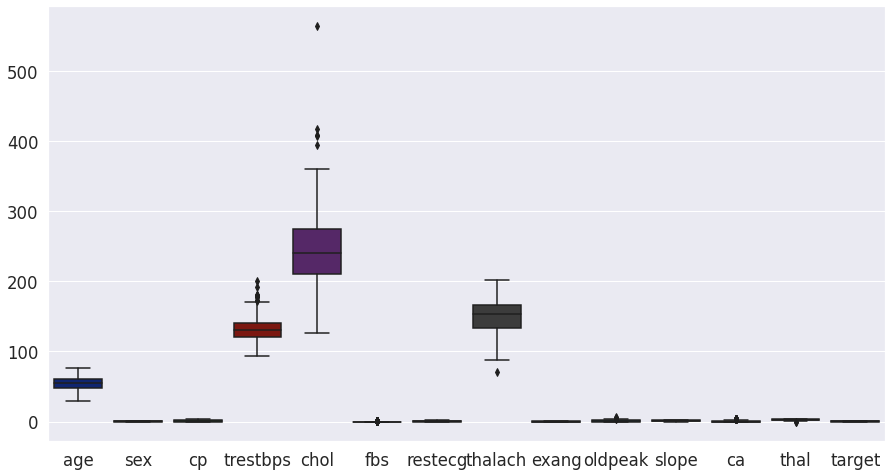

In [ ]:
# 데이터 파일 읽기
raw = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/heart - azure.csv')


# 데이터 량 1/3 하기
# raw = raw.head(100)
#      => 첫 166명이 전원 심장병이라 결과가 1.0이 된다.

# 샘플 내용 확인 함수
# 입력 데이터는 반드시 pandas의 데이터 프레임이어야 한다.
def show_sample(data):
    print('데이터 샘플 10개 >>')  # 샘플 출력
    print(data.head(10))
    print('데이터 통계 >>')  # 통계 출력
    print(data.describe())
    plt.figure(figsize = (15, 8))  # 상자 그림 출력
    sns.boxplot(data = data, palette = 'dark')

show_sample(raw)

In [ ]:
# 데이터 입력/출력 분할
X_data = raw.drop('target', axis = 1)
Y_data = raw['target']

print(X_data.shape)
print(Y_data.shape)

names = X_data.columns
print(names)

(303, 13)
(303,)
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


데이터 샘플 10개 >>
        age       sex        cp  trestbps      chol       fbs   restecg  \
0  0.952197  0.681005  1.973123  0.763956 -0.256334  2.394438 -1.005832   
1 -1.915313  0.681005  1.002577 -0.092738  0.072199 -0.417635  0.898962   
2 -1.474158 -1.468418  0.032031 -0.092738 -0.816773 -0.417635 -1.005832   
3  0.180175  0.681005  0.032031 -0.663867 -0.198357 -0.417635  0.898962   
4  0.290464 -1.468418 -0.938515 -0.663867  2.082050 -0.417635  0.898962   
5  0.290464  0.681005 -0.938515  0.478391 -1.048678 -0.417635  0.898962   
6  0.180175 -1.468418  0.032031  0.478391  0.922521 -0.417635 -1.005832   
7 -1.143291  0.681005  0.032031 -0.663867  0.323431 -0.417635  0.898962   
8 -0.260980  0.681005  1.002577  2.306004 -0.913400  2.394438  0.898962   
9  0.290464  0.681005  1.002577  1.049520 -1.512490 -0.417635  0.898962   

    thalach     exang   oldpeak     slope        ca      thal  
0  0.015443 -0.696631  1.087338 -2.274579 -0.714429 -2.148873  
1  1.633471 -0.696631  2.122573 

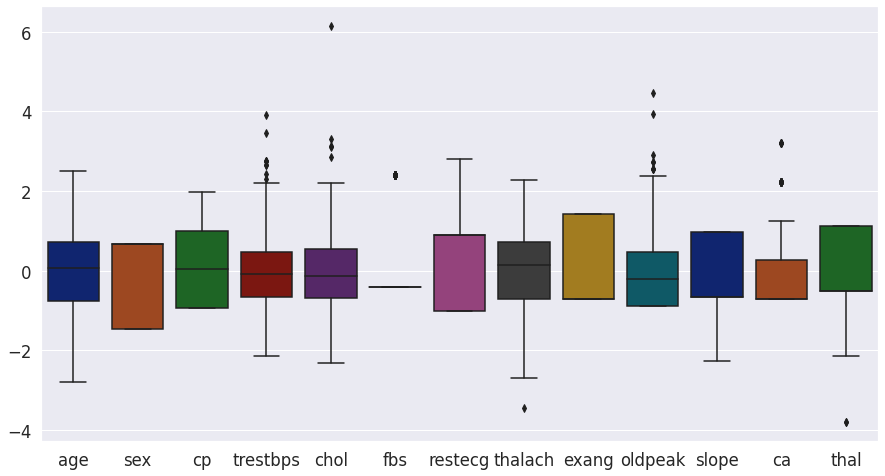

In [ ]:
# 데이터 Z-정규화
scaler = StandardScaler()
X_data = scaler.fit_transform(X_data)

# show_sample(X_data)    => 여기서 X_data는 numpy 타입이라 실행시 에러 발생
                       # => 고치려면 numpy 타입을 pandas 타입으로 변환해야함

# numpy => pandas로 변환
X_data = pd.DataFrame(X_data, columns = names)
show_sample(X_data)

In [ ]:
# 데이터를 학습용과 평가용으로 분할하기
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data,
                                                    train_size = MY_SPLIT,
                                                    shuffle = True)

# 최종 데이터 모양 확인
print('학습용 입력 데이터 모양 :', X_train.shape)
print('학습용 출력 데이터 모양 :', Y_train.shape)
print('평가용 입력 데이터 모양 :', X_test.shape)
print('평가용 출력 데이터 모양 :', Y_test.shape)

학습용 입력 데이터 모양 : (212, 13)
학습용 출력 데이터 모양 : (212,)
평가용 입력 데이터 모양 : (91, 13)
평가용 출력 데이터 모양 : (91,)


3. 인공 신경망 구현

In [ ]:
# DNN 구현
model = Sequential()

# 입력층과 은닉층1 추가
model.add(Dense(units = MY_HIDDEN, 
                input_dim = INPUT_DIM, 
                activation = 'tanh',
                name = 'Dense1'))

# 은닉층2 추가
model.add(Dense(units = MY_HIDDEN, 
                activation = 'tanh',
                name = 'Dense2'))

# 출력층 추가
model.add(Dense(1, activation = 'sigmoid',
                name = 'Dense3'))

print('DNN 요약')
model.summary()

DNN 요약
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense1 (Dense)               (None, 500)               7000      
_________________________________________________________________
Dense2 (Dense)               (None, 500)               250500    
_________________________________________________________________
Dense3 (Dense)               (None, 1)                 501       
Total params: 258,001
Trainable params: 258,001
Non-trainable params: 0
_________________________________________________________________


4. 인공 신경망 학습

In [ ]:
# DNN 학습 방법 설정
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['acc'])


# DNN 학습
begin = time()

print('학습 시작')

model.fit(x = X_train,
          y = Y_train,
          epochs = MY_EPOCH,
          verbose = 0)

end = time()

print('학습 시간 : {:.2f}초'.format(end - begin))


학습 시작
학습 시간 : 14.34초


5. 인공 신경망 평가

In [ ]:
# DNN 평가
score = model.evaluate(x = X_test, y = Y_test, 
               verbose = 0)

print('최종 손실값 : {:.2f}'.format(score[0]))
print('최종 정확도 : {:.2f}'.format(score[1]))

최종 손실값 : 1.91
최종 정확도 : 0.71


6. 인공 신경망 예측

In [ ]:
# DNN 예측
pred = model.predict(x = X_test)
pred = (pred > 0.5)

print(pred.flatten())
print(Y_test.to_list())

# 혼돈 행렬 출력
print('혼돈행렬')
print(confusion_matrix(y_true = Y_test,
                       y_pred = pred))


[ True  True False False False  True  True  True False False  True False
 False  True False  True False  True  True  True  True  True False False
  True  True False  True  True  True  True  True  True False False False
  True  True  True  True  True False False  True  True  True  True False
 False False False False  True False False  True False  True False False
 False False False  True False  True  True  True False  True  True False
 False False  True False False  True False False False  True False False
  True  True  True False False  True  True]
[0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1]
혼돈행렬
[[29 11]
 [15 36]]


In [ ]:

# 3. F1 점수 출력
f1 = f1_score(y_pred = pred,
              y_true = Y_test,
              average = 'micro')
print('F1점수 : {:.2f}'.format(f1))

F1점수 : 0.71
